In [1]:
%matplotlib inline
%load_ext watermark
%watermark -v -m -p numpy,scipy,pandas,matplotlib,seaborn,sklearn,pywt 

CPython 3.5.2
IPython 5.1.0

numpy 1.11.1
scipy 0.18.0
pandas 0.18.1
matplotlib 1.5.1
seaborn 0.7.1
sklearn 0.19.dev0
pywt 0.4.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)
system     : Darwin
release    : 16.0.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
# import seaborn as sns

from pandas import set_option
set_option("display.max_rows", 20)
pd.options.mode.chained_assignment = None

In [3]:
dataset_header = pd.read_csv('../hypercube.09.2016/hypercube data/4Lorenzo/Datamatrix_header.txt', names=['Header'])
header = dataset_header['Header'].tolist()

In [4]:
dataset_training = pd.read_csv('../hypercube.09.2016/hypercube data/4Lorenzo/Dataset_all_training.dat', sep="  ", names=header)

/Users/lorenzoperozzi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [5]:
    # Change variable type
    dataset_training['PseudoLitho'] = dataset_training['PseudoLitho'].astype('int')
    dataset_training['RockCode'] = dataset_training['RockCode'].astype('int')
    dataset_training['Outcome'] = dataset_training['Outcome'].astype('int')

In [6]:
dataset_training['Outcome'].unique().sum()
dataset_training['Class'] = dataset_training.apply(lambda row: 0 if row["Outcome"] == 0 else 1, axis=1)
dataset_training.head()

,Count_Fault_Crossing,Dist_2_CDI,distance_to_Fault_Network,Distance_to_AuGt150,Distance_to_CuGt2000,Distance_to_high_curvature_along_faults,GRAV_effective_density,Gravity_1VD,Gravity_Analytic_Signal,Kpct,PseudoLitho,RockCode,Thppm,TMI_1VD,TMI_Analytic_Signal,TMI_effective_susc,U_div_Th,Uppm,Outcome,class
0,0.167869,1951.89,334.578,19599.8,5135.24,3073.00,0.230058,0.000756,0.001131,0.517956,4,1,11.5835,-0.000482,0.102906,0.332257,0.134642,1.55958,0,0
1,0.159692,1951.58,279.660,19523.0,5235.09,2997.63,0.229627,0.000765,0.001162,0.523862,4,1,11.7754,0.032979,0.172299,0.332192,0.135796,1.59911,0,0
2,0.153920,1951.30,224.744,19446.4,5334.95,2923.75,0.228073,0.000773,0.001192,0.505136,4,1,11.6611,0.099562,0.241855,0.330549,0.137801,1.60679,0,0
3,0.148629,1951.05,169.826,19370.0,5434.81,2851.46,0.225421,0.000782,0.001222,0.472606,4,1,11.1736,0.188753,0.307704,0.330063,0.139802,1.56175,0,0
4,0.143338,1950.88,114.908,19293.8,5534.67,2780.88,0.222033,0.000790,0.001253,0.442808,4,1,10.5124,0.284289,0.365465,0.328266,0.142308,1.49541,0,0


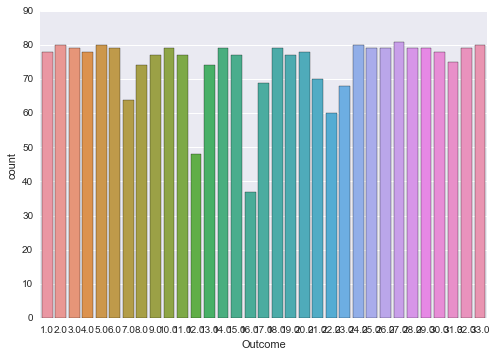

In [7]:
#save plot display settings to change back to when done plotting with seaborn
inline_rc = dict(mpl.rcParams)

import seaborn as sns
sns.set()
dataset_training['Outcome'].replace(to_replace=0, value=np.nan, inplace=True)
sns.countplot(x="Outcome", data=dataset_training)
dataset_training['Outcome'].replace(to_replace=np.nan, value=0, inplace=True)

#switch back to default matplotlib plot style
mpl.rcParams.update(inline_rc)

In [8]:
dataset_training.replace(to_replace=-99999, value=np.nan, inplace=True)
# dataset_training.replace(to_replace=np.nan, value=-99999, inplace=True)
dataset_training.isnull().sum()

Count_Fault_Crossing                        0
Dist_2_CDI                                  0
distance_to_Fault_Network                   0
Distance_to_AuGt150                         0
Distance_to_CuGt2000                        0
Distance_to_high_curvature_along_faults     0
GRAV_effective_density                      0
Gravity_1VD                                54
Gravity_Analytic_Signal                    54
Kpct                                        0
PseudoLitho                                 0
RockCode                                    0
Thppm                                       0
TMI_1VD                                     0
TMI_Analytic_Signal                         0
TMI_effective_susc                          0
U_div_Th                                    0
Uppm                                        0
Outcome                                     0
class                                       0
dtype: int64

In [10]:
dataset_training.to_pickle('data/Dataset_all_training.pkl')